# Setup

In [102]:
# Necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, load the data, from the supplied data file.

This database with the name "pax_local_all_agreements_data.csv" lists all agreements included on the main PA-X database that deal in some way with local issues, involve local actors, and deal with forms of local/communal violent conflict. Agreements span the 1990 to mid-2020 period, with global coverage, forming a collection of 286 local agreements.

In [134]:
# Read in the data
data = pd.read_csv("pax_local_all_agreements_data.csv")
# Have a look at it
data.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
0,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1210,1,Decisions on Mostar of 12 February 1997,1997-02-12,Multiparty signed/agreed,...,1,0,0,0,1,0,0,1,0,1
1,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1644,1,Agreement on the disarmament of the able-bodie...,1995-07-24,Multiparty signed/agreed,...,0,0,0,1,1,1,0,0,0,0
2,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1850,1,Agreement,1994-03-04,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,0
3,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1297,1,Declaration,1993-10-22,Multiparty signed/agreed,...,0,1,0,0,1,0,0,0,0,0
4,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1569,1,Joint Statement,1993-10-21,Multiparty signed/agreed,...,0,1,0,0,0,0,0,0,0,0


# Describe : tell us about the data that you have.

First, this is the description about the data that I have, I will answer all the questions in the handbook.

1. What is the general type of the data (tabular, network, geographical, textual etc.)?

* The general type of the data is tabular.

2. How large and complex is it (rows/columns, size, variation, structure)?

In [135]:
# How many rows and columns in the data :
print(f' It has {data.shape[0]} rows and {data.shape[1]}columns.')

 It has 286 rows and 55columns.


In [136]:
# What's the size of the data ?
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 55 columns):
Con                286 non-null object
Contp              286 non-null object
PP                 286 non-null int64
PPName             286 non-null object
Reg                286 non-null object
AgtId              286 non-null int64
Ver                286 non-null int64
Agt                286 non-null object
Dat                286 non-null object
Status             286 non-null object
Lgt                286 non-null int64
N_characters       286 non-null int64
Stage              286 non-null object
StageSub           280 non-null object
Part               283 non-null object
ThrdPart           145 non-null object
OthAgr             70 non-null object
Loc1ISO            286 non-null object
Loc2ISO            14 non-null object
Loc1GWNO           286 non-null int64
Loc2GWNO           14 non-null float64
UcdpCon            214 non-null object
UcdpAgr            1 non-null float64
PamAgr 

3. What fileds and data types are present ？

* This database lists all agreements included on the main PA-X database that deal in some way with local issues, in cases of local negotiation practices that are on the margins of wider conflict, or in cases of local/communal violent conflict. Agreements are collected from 1990 to 2019. Many kinds of types are in the dataset, for example,  'Boolean','String' and 'Float',etc.

4. Links between this data and other data (e.g. foreign keys, unique ids) 

* There are no foreign keys or unique ids in the data.

5. Summary statistics about the data ?

* First, I will get the data time span by code instead of by the introduction from data holder.

In [137]:
# data.info()
data['year'] = data['Dat'].astype(str)
# data['year'] = [ i[-2:] for i in data['Dat']]
data['year'] = data['year'].str[:4]
# data['date'].str[-2:]
data['year'] = data['year'].astype(int)
start = data['year'].min()
end = data['year'].max()
print('The data time span covered from %d to %d' % (start, end))

x_axis = list(range(start, end+1))

The data time span covered from 1991 to 2020


* Next, you can see all the column names below which can show us the summary information of our data.

In [120]:
data.columns.values

array(['Con', 'Contp', 'PP', 'PPName', 'Reg', 'AgtId', 'Ver', 'Agt',
       'Dat', 'Status', 'Lgt', 'N_characters', 'Stage', 'StageSub',
       'Part', 'ThrdPart', 'OthAgr', 'Loc1ISO', 'Loc2ISO', 'Loc1GWNO',
       'Loc2GWNO', 'UcdpCon', 'UcdpAgr', 'PamAgr', 'CowWar', 'PT_FSP',
       'PT_ISP', 'PT_IPP', 'PT_UTE', 'LinkNatProcess', 'LocaleName',
       'LocaleNat', 'LatDec', 'LongDec', 'Mediator', 'MedCentState',
       'MedRegState', 'MedLocState', 'MedLocArmed', 'MedReDomEld',
       'MedLocCivSoc', 'MedIntActor', 'MedOtherUnclear', 'CentState',
       'RegState', 'LocState', 'LocArmedGr', 'ReDomEld', 'LocComSoc',
       'IntActor', 'OthActor', 'RitPray', 'Grieve', 'Cattle', 'Cover',
       'year'], dtype=object)

In addition, you can see the accurate descriptions and explanations of these column names in the codebook.

6. How does the data relate to the questions that the data owner has discussed with you?

The data owner told us one element is a new ‘local agreements’ database which can be found here:  https://www.peaceagreements.org/lsearch. She said there are currently NO visualisations of this, and even showing these on maps would be good. It would be great if we could concentrate on these local agreements, and no-one else is doing this as far as she can see. Our group may do the final project using the map to visualize the data, but it is up to my group discussion in the next few weeks.

# Explore : carry out a deeper exploration of the data.

This includes looking at individual fields/variables to see the distribution of values they take. In this part, I learnd how to make graphs to show how data are distributed in time.

First, I will have an overview look towards the number of agreements per year. I choose to visualize it by a line chart.

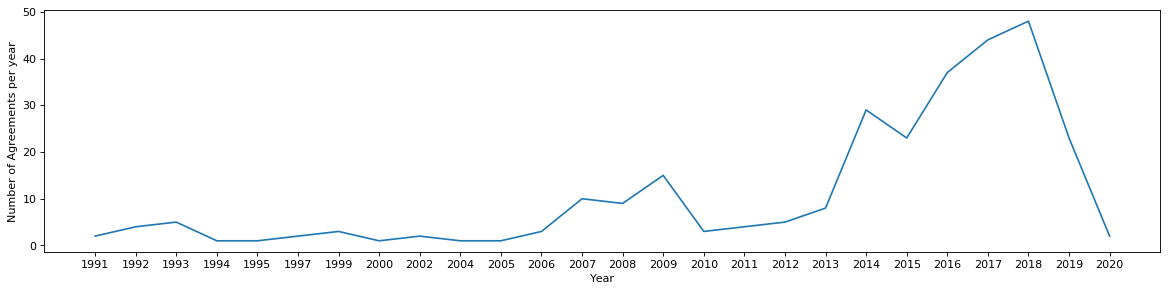

In [138]:
plt.figure(figsize=(18,4),dpi=80)
plt.xlabel("Year")
plt.ylabel("Number of Agreements per year")
data['year'] = data['Dat'].str[:4]
var = data.groupby(['year']).size()
var.to_list()
plt.plot(var.index.to_list(),var.to_list())
plt.show()

You can see that the number of peace agreements before 2007 had a stable trend, in 2014 it grew dramatically。
It kept the trend of increaing between 2015 to 2018, hooever, there was a drop in the past 2019. In 2020, because of the lack of data collection, it can be explained that why the number decreased. Briefly, the peace agreements of the last decade are more than the previous two decades. It peaked in 2018 and I can do some further studies to explore it, such as do some text analysis which can extract a set of keywords that characterize the information in every single peace agreement. 

Next, I look at how agreements distributed in region. It may be clearer than looking at how agreements distributed in countries beacause there are too many countries in the dataset. 

Reg
Africa (excl MENA)              116
Asia and Pacific                 23
Cross-regional                    1
Europe and Eurasia               12
Middle East and North Africa    134
dtype: int64


<Figure size 1600x1600 with 0 Axes>

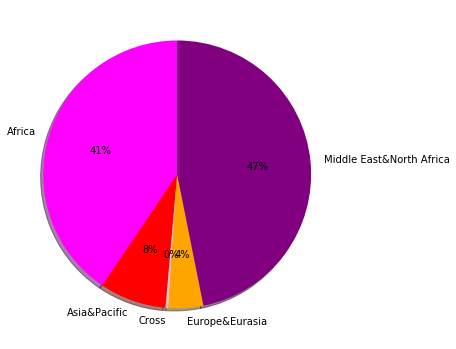

In [146]:
plt.figure(figsize=(20,20),dpi=80)
Region = data.groupby(['Reg']).size()
print(Region)
colors = ['magenta','red','pink','orange','purple']
plt.figure(figsize=(6,9))
labels = [u'Africa',u'Asia&Pacific',u'Cross',u'Europe&Eurasia',u'Middle East&North Africa'] 
plt.pie(
    Region,
    labels=labels,
    colors=colors,
    startangle=90,
    shadow=True,
    autopct='%1.0f%%'
)
plt.show()

You can see that Middle East and North Africa are the areas with the most peace agreements in 20 years which means they have the most conflicts in contrast to regions.

Next, after discussing with my group, we found more things to do. Besides the overview analysis I did above, I was allocated to do more analysis towards column M(Stage) which represents Agreement stage.
This is a character variable that provides information on the stage of the peace process 
that the agreement is signed in. It has identified seven main stages of the process that 
agreements may be part of: pre-negotiation/process; substantive-comprehensive; 
substantive-partial; implementation/renegotiation; renewal; ceasefire/related; other. You can see the distribution of different kinds of agreement stages below.

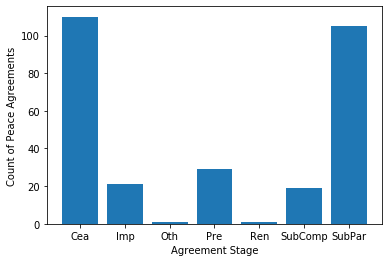

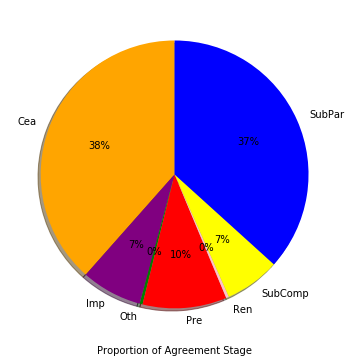

In [150]:
plt.xlabel("Agreement Stage")
plt.ylabel("Count of Peace Agreements")
var = data.groupby(['Stage']).size()
var.to_list()
plt.bar(x=var.index.to_list(),height=var.to_list())

Sta = data.groupby(['Stage']).size()
colors = ['orange','purple','green','red','pink','yellow','blue']
plt.figure(figsize=(6,9))
labels = [u'Cea',u'Imp',u'Oth',u'Pre',u'Ren',u'SubComp',u'SubPar'] 
plt.xlabel("Proportion of Agreement Stage")
plt.pie(
    Sta,
    labels=labels,
    colors=colors,
    startangle=90,
    shadow=True,
    autopct='%1.0f%%'
)

plt.show()

You can see that Cea which represents Ceasefire/related is the most in the past 30 years. This category contains agreements which provide in their entirety for a ceasefire, or associated demobilisation, or an agreement that is purely providing a monitoring arrangement for, or extension, of a ceasefire. The stage called SubPar is the second most among these stages. It concerns parties that are engaged in discussion and agreeing to substantive issues to resolve the conflict, but only deal with some of the issues in ways that appear to contemplate future
agreements to complete. 

Next, I wonder how these 7 kinds of agreement stages distributed in time ?

['Imp', 'Cea', 'Pre', 'SubPar', 'SubComp', 'Oth', 'Ren']
Imp
Cea
Pre
SubPar
SubComp
Oth
Ren


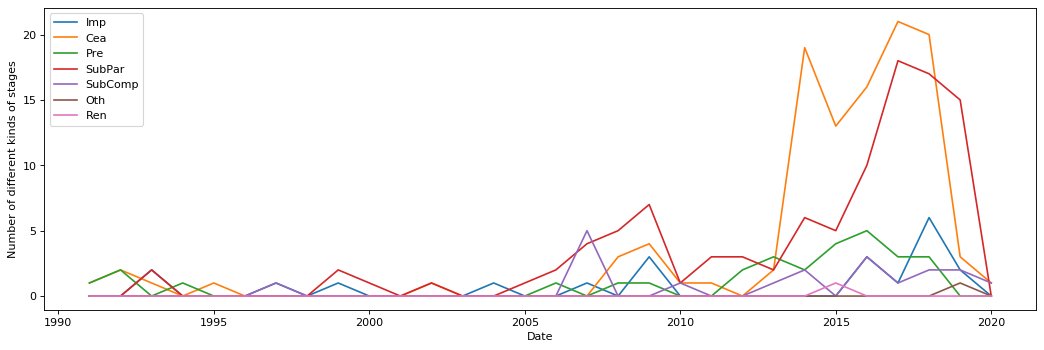

In [133]:
plt.figure(figsize=(16,5),dpi=80)
stages = data['Stage'].drop_duplicates('first').values.tolist() #gain all stages name
print(stages)
var = data.groupby('Stage')['year'].value_counts()
var = var.sort_index()
stages_y={}
for stage in stages:
    print(stage)
    this_stage_x = var.loc[stage].index.tolist()
    stages_y[stage] = []
    k = 0
    for year in x_axis:
        if (k < this_stage_x.__len__()):
            if year != this_stage_x[k]:
                stages_y[stage].append(0)
            else:
                stages_y[stage].append(var.loc[stage].values[k])
                k = k + 1
        else:
            stages_y[stage].append(0)
#     print(stages_y[stage])
                  
for stage in stages:
    plt.plot(x_axis, stages_y[stage], label=stage)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of different kinds of stages")
plt.show()

You can see that the trend of the number of different kinds of stages is roughly similar. Countries were more likely to sign agreements with the stage Ceasefire or SubPar in the past 5 years, however, there was no significant preference before 2005.

# Reflect and Hypothesise

1. Reflection on the data.

In this assignment, I did overall data analysis to explore how agreements distributed in time and region, such as the number of agreements per year and the number of agreements in different regions. Then I had a look at column M(Stage) which represents Agreement stage. I learned how to draw a time line chart and processing the data set more efficiently. Middle East, combined with and Africa(including North Africa), made up over 88% of all peace agreements in the past 30 years. Thus, it would be meaningful to explore the specific data(text, news, comments...etc.) in Middle East and Africa to understand its underlying causes. In addition, agreements with the stage Ceasefire were the most in the past 30 years, however, the ceasefire leaves a lot to the goodwill of the forces involved. I am curious about whether the army would comply with these ceasefire agreements, in other words, how can we measure the implementation effect of the ceasefire agreements? In my opinion, some interesting data analysis can also be tried for this topic.

2. What hypotheses came up as you explored the data

* hypothesis 1:
Middle East and North Africa lead to the trend of world agreements number.

Reason: My graph 1 shows the trend of the number of agreements all over the world. According to my graph 2, Middle East and North Africa have the most peace agreements in the past 20 years. I am curious about whether Middle East and North Africa lead to the trend of world agreements number？

Test method: I can test this hypothese by checking the data individually. I decide to draw a graph to show the trend of the number of peace agreements in Middle East and North Africa, then use it to compare with the global trend. By this method, I think I can test this hypothese intuitively.

<Figure size 1440x320 with 0 Axes>

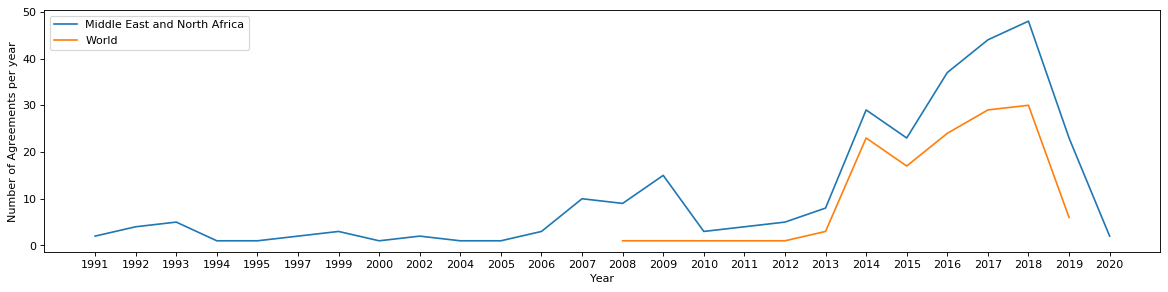

In [173]:
#the global trend
plt.figure(figsize=(18,4),dpi=80)
data['year'] = data['Dat'].str[:4]
var = data.groupby(['year']).size()
var.to_list()
# the trend in Middle East and North Africa
plt.figure(figsize=(18,4),dpi=80)
plt.xlabel("Year")
plt.ylabel("Number of Agreements per year")
data['year'] = data['Dat'].str[:4]
varmid= data[data.Reg=="Middle East and North Africa"]
var1 = varmid.groupby(['year']).size()
var1.to_list()
plt.plot(var.index.to_list(),var.to_list(),label='Middle East and North Africa')
plt.plot(var1.index.to_list(),var1.to_list(),label='World')
plt.legend()
plt.show()

Conclusion: We can see that Middle East and North Africa was related to the trend of world agreements number after 2013 . However, there were no agreements in Middle East and North Africa before 2008 which I can not explain by simple data analysis. I need do more research to know the reason.

* hypothesis 2: There is a chronological sequence for the stages of the peace agreements signed.

Reason: The trend of stage number is roughly similar, but there is a time lag between them. 

Test method: I need do some further studies to test this hypothesis, for example, to read relevant papers about agreement stage, to ask the data holder for more details about the connection between different stages. Maybe it is a wrong hypothesis, but I am curious about what is the behind these 7 stages.

* hypothesis 3: The distribution of agreement stage in each region is different. There are more agreements with the stage Ceasefire in the Middle East and North Africathan than in other regions.

Reason: As we all konw, there are more conflicts and wars in the Middle East and North Africa because we can always see more news about wars in this region. So I guess there are more agreements with the stage Ceasefire in this region than the others.

Test method: I can test this hypothese by checking the data individually. I decide to count to the number of Ceasefire agreements in Middle East and North Africa, then use it to compare with the number of all the other regions. By this method, I think I can test this hypothese.

In [166]:
Middle= data[data.Reg=="Middle East and North Africa" ]
Cea1=Middle[Middle.Stage=="Cea"]
OtherReg= data[data.Reg!="Middle East and North Africa" ]
Cea2=OtherReg[OtherReg.Stage=="Cea"]
print("The number of Ceasefire agreements in Middle East and North Africa is",Cea1.shape[0])
print("The number of Ceasefire agreements in other regions is",Cea2.shape[0])

The number of Ceasefire agreements in Middle East and North Africa is 88
The number of Ceasefire agreements in other regions is 22


Conclusion: You can see that my hypothesis is tested to be true. There are more agreements with the stage Ceasefire in the Middle East and North Africathan than in other regions.